In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
from keras import models
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Dataset link: https://drive.google.com/drive/folders/1RNOg9Au19eSA5xKd-Sx_GdAm6k1j-fCQ?usp=sharing
os.chdir('./drive/My Drive/signature_data_one_shot')

In [ ]:
!ls

signature_forgery_one_shot.h5  test_data  train_data  validation_data


#Loading trained model

In [ ]:
model = models.load_model('signature_forgery_one_shot.h5')

#Helper functions

In [ ]:
def show_images(path_img_1, path_img_2):
    img1 = cv2.imread(path_img_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path_img_2, cv2.IMREAD_GRAYSCALE)

    cv2_imshow(img1)
    cv2_imshow(img2)

In [ ]:
def check_forgery(path_img_1, path_img_2):
    img1 = cv2.imread(path_img_1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(path_img_2, cv2.IMREAD_GRAYSCALE)
    img1 = img1.reshape((1, 268, 650, 1))
    img2 = img2.reshape((1, 268, 650, 1))
    img1 = img1.astype('float32') / 255
    img2 = img2.astype('float32') / 255

    if model.predict((img1, img2))[0][0] >=0.5:
        return 'Genuine Signatures'
    else:
        return 'Forged Signatures'

#Checking Forgery using the model

In [ ]:
!ls test_data

063	  064	    065       066	067	  068	    069
063_forg  064_forg  065_forg  066_forg	067_forg  068_forg  069_forg


In [ ]:
# 063 contains genuine signatures of a same person
!ls test_data/063

01_063.png  03_063.png	05_063.png  07_063.png	09_063.png  11_063.png
02_063.png  04_063.png	06_063.png  08_063.png	10_063.png  12_063.png


In [ ]:
# 063_forg contains forged signatures of the same person
!ls test_data/063_forg

01_0104063.PNG	01_0119063.PNG	02_0108063.PNG	03_0104063.PNG
01_0108063.PNG	02_0104063.PNG	02_0119063.PNG	03_0108063.PNG


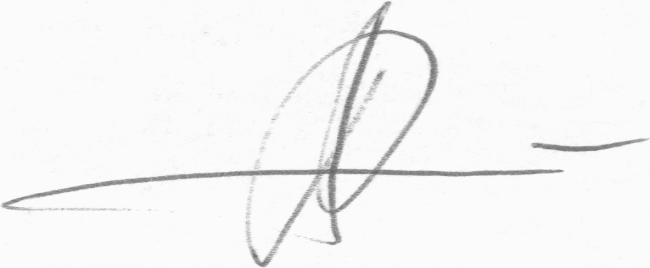

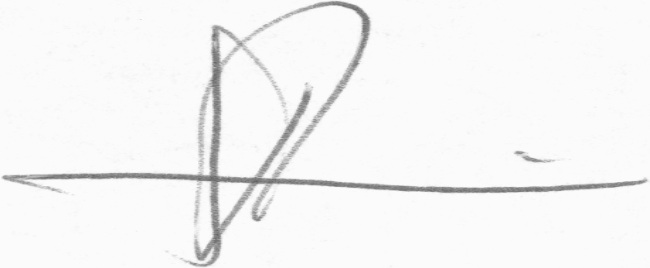

In [ ]:
# visualizing the two images
show_images('test_data/063/01_063.png', 'test_data/063/02_063.png')

In [ ]:
# Checking Forgery
check_forgery('test_data/063/01_063.png', 'test_data/063/02_063.png')

'Genuine Signatures'

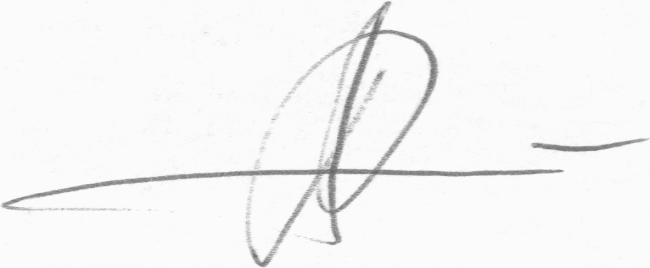

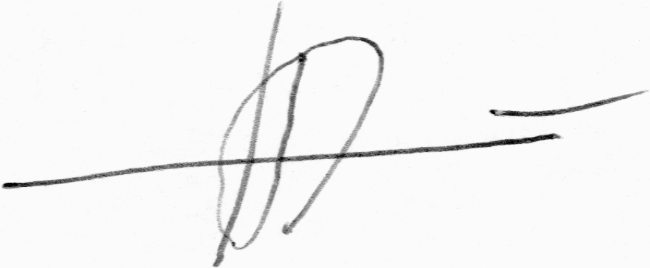

In [ ]:
show_images('test_data/063/01_063.png', 'test_data/063_forg/01_0104063.PNG')

In [ ]:
check_forgery('test_data/063/01_063.png', 'test_data/063_forg/01_0104063.PNG')

'Forged Signatures'

In [ ]:
!ls test_data/064

01_064.png  03_064.png	05_064.png  07_064.png	09_064.png  11_064.png
02_064.png  04_064.png	06_064.png  08_064.png	10_064.png  12_064.png


In [ ]:
!ls test_data/064_forg

01_0105064.PNG	02_0105064.PNG	03_0105064.PNG	04_0105064.PNG
01_0203064.PNG	02_0203064.PNG	03_0203064.PNG	04_0203064.PNG


In [ ]:
check_forgery('test_data/064/05_064.png', 'test_data/064_forg/01_0203064.PNG')

'Forged Signatures'